In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv("Credit.tsv",sep='\t',index_col=0)

In [3]:
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016
209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25-07-2016


In [4]:
df.shape

(209593, 36)

In [46]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [15]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,P_month,P_Day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,999606.368100,810096.000000,55000.000000,999479.419300,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240100,38.000000,64.000000,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.00000


* We can notice there are no null values in the dataset..but many columns have minimum values as 0.
* Almost all columns have right skewness and outliers present in it.
* AON has negative value,age cannot be negative.
* Certain features have amount in negative which needs to be checked for an anomaly.

In [3]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [3]:
#removing pcricle column as all records have same pcircle.
df.drop(['pcircle'],axis=1,inplace=True)

In [4]:
#removing the msisdn column as it will be of no use for prediction of loan default
df.drop(['msisdn'],axis=1,inplace=True)

In [5]:
#changing the pdate from object format to numerical values of date and month separately.
#Year is not taken into consideration as all records are of same year i.e. 2016.
df["P_month"]=pd.to_datetime(df.pdate, format="%d-%m-%Y").dt.month
df["P_Day"]=pd.to_datetime(df.pdate, format="%d-%m-%Y").dt.day

In [6]:
#removing the pdate column as we have got the information that is important for our modelling.
df.drop(['pdate'],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  float64
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

In [14]:
#to find out the number of unique values in the columns.
for i in df.columns:
    print('Unique value in',i,'is',df[i].nunique())  

Unique value in label is 2
Unique value in aon is 4507
Unique value in daily_decr30 is 146328
Unique value in daily_decr90 is 155483
Unique value in rental30 is 131338
Unique value in rental90 is 139036
Unique value in last_rech_date_ma is 1186
Unique value in last_rech_date_da is 1174
Unique value in last_rech_amt_ma is 70
Unique value in cnt_ma_rech30 is 71
Unique value in fr_ma_rech30 is 1083
Unique value in sumamnt_ma_rech30 is 15141
Unique value in medianamnt_ma_rech30 is 510
Unique value in medianmarechprebal30 is 23907
Unique value in cnt_ma_rech90 is 110
Unique value in fr_ma_rech90 is 89
Unique value in sumamnt_ma_rech90 is 31771
Unique value in medianamnt_ma_rech90 is 608
Unique value in medianmarechprebal90 is 22694
Unique value in cnt_da_rech30 is 1066
Unique value in fr_da_rech30 is 1072
Unique value in cnt_da_rech90 is 27
Unique value in fr_da_rech90 is 46
Unique value in cnt_loans30 is 40
Unique value in amnt_loans30 is 48
Unique value in maxamnt_loans30 is 1050
Unique v

In [7]:
#cleaning aon
df['aon']= abs(df['aon']) #removing the negative values
df['aon'] = np.where(df['aon']>df['aon'].quantile(0.75) + 1.5*(df['aon'].quantile(0.75)-df['aon'].quantile(0.25)),df['aon'].quantile(0.75) + 1.5*(df['aon'].quantile(0.75)-df['aon'].quantile(0.25)),df['aon'])

In [8]:
#cleaning daily_decr30
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr30']=np.where(df['daily_decr30']>df['daily_decr30'].quantile(0.75)+1.5*(df['daily_decr30'].quantile(.75)-df['daily_decr30'].quantile(0.25)),df['daily_decr30'].quantile(0.75)+1.5*(df['daily_decr30'].quantile(0.75)-df['daily_decr30'].quantile(0.25)),df['daily_decr30'])

In [9]:
df['daily_decr90']=abs(df['daily_decr90'])
df['daily_decr90']=np.where(df['daily_decr90']>df['daily_decr90'].quantile(0.75)+1.5*(df['daily_decr90'].quantile(.75)-df['daily_decr90'].quantile(0.25)),df['daily_decr90'].quantile(0.75)+1.5*(df['daily_decr90'].quantile(0.75)-df['daily_decr90'].quantile(0.25)),df['daily_decr90'])

In [10]:
df['rental30']=abs(df['rental30'])
df['rental30']=np.where(df['rental30']<df['rental30'].quantile(0.25)-1.5*(df['rental30'].quantile(0.75)-df['rental30'].quantile(0.25)),df['rental30'].quantile(0.25)-1.5*(df['rental30'].quantile(.75)-df['rental30'].quantile(0.25)),df['rental30'])

In [11]:
df['rental90']=abs(df['rental90'])
df['rental90']=np.where(df['rental90']<df['rental90'].quantile(0.25)-1.5*(df['rental90'].quantile(0.75)-df['rental90'].quantile(0.25)),df['rental90'].quantile(0.25)-1.5*(df['rental90'].quantile(0.75)-df['rental90'].quantile(0.25)),df['rental90'])

In [12]:
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['last_rech_date_ma']=np.where(df['last_rech_date_ma']>df['last_rech_date_ma'].quantile(0.75)+1.5*(df['last_rech_date_ma'].quantile(0.75)-df['last_rech_date_ma'].quantile(0.25)),df['last_rech_date_ma'].quantile(0.75)+1.5*(df['last_rech_date_ma'].quantile(0.75)-df['last_rech_date_ma'].quantile(0.25)),df['last_rech_date_ma'])

In [13]:
df['last_rech_date_da']=abs(df['last_rech_date_da'])
df['last_rech_date_da']=np.where(df['last_rech_date_da']>df['last_rech_date_da'].quantile(0.75)+1.5*(df['last_rech_date_da'].quantile(0.75)-df['last_rech_date_da'].quantile(0.25)),df['last_rech_date_da'].quantile(0.75)+1.5*(df['last_rech_date_da'].quantile(0.75)-df['last_rech_date_da'].quantile(0.25)),df['last_rech_date_da'])

In [14]:
df['last_rech_amt_ma']=abs(df['last_rech_amt_ma'])
df['last_rech_amt_ma']=np.where(df['last_rech_amt_ma']>df['last_rech_amt_ma'].quantile(0.75)+1.5*(df['last_rech_amt_ma'].quantile(0.75)-df['last_rech_amt_ma'].quantile(0.25)),df['last_rech_amt_ma'].quantile(0.75)+1.5*(df['last_rech_amt_ma'].quantile(0.75)-df['last_rech_amt_ma'].quantile(0.25)),df['last_rech_amt_ma'])

In [15]:
df['cnt_ma_rech30']=abs(df['cnt_ma_rech30'])
df['cnt_ma_rech30']=np.where(df['cnt_ma_rech30']>df['cnt_ma_rech30'].quantile(0.75)+1.5*(df['cnt_ma_rech30'].quantile(0.75)-df['cnt_ma_rech30'].quantile(0.25)),df['cnt_ma_rech30'].quantile(0.75)+1.5*(df['cnt_ma_rech30'].quantile(0.75)-df['cnt_ma_rech30'].quantile(0.25)),df['cnt_ma_rech30'])

In [16]:
df['fr_ma_rech30']=np.where(df['fr_ma_rech30']>df['fr_ma_rech30'].quantile(0.75)+1.5*(df['fr_ma_rech30'].quantile(0.75)-df['fr_ma_rech30'].quantile(0.25)),df['fr_ma_rech30'].quantile(0.75)+1.5*(df['fr_ma_rech30'].quantile(0.75)-df['fr_ma_rech30'].quantile(0.25)),df['fr_ma_rech30'])

In [17]:
df['sumamnt_ma_rech30']=np.where(df['sumamnt_ma_rech30']>df['sumamnt_ma_rech30'].quantile(0.75)+1.5*(df['sumamnt_ma_rech30'].quantile(0.75)-df['sumamnt_ma_rech30'].quantile(0.25)),df['sumamnt_ma_rech30'].quantile(0.75)+1.5*(df['sumamnt_ma_rech30'].quantile(0.75)-df['sumamnt_ma_rech30'].quantile(0.25)),df['sumamnt_ma_rech30'])

In [18]:
df['medianamnt_ma_rech30']=np.where(df['medianamnt_ma_rech30']>df['medianamnt_ma_rech30'].quantile(0.75)+1.5*(df['medianamnt_ma_rech30'].quantile(0.75)-df['medianamnt_ma_rech30'].quantile(0.25)),df['medianamnt_ma_rech30'].quantile(0.75)+1.5*(df['medianamnt_ma_rech30'].quantile(0.75)-df['medianamnt_ma_rech30'].quantile(0.25)),df['medianamnt_ma_rech30'])

In [19]:
df['medianmarechprebal30']=abs(df['medianmarechprebal30'])
df['medianmarechprebal30']=np.where(df['medianmarechprebal30']>df['medianmarechprebal30'].quantile(0.75)+1.5*(df['medianmarechprebal30'].quantile(0.75)-df['medianmarechprebal30'].quantile(0.25)),df['medianmarechprebal30'].quantile(0.75)+1.5*(df['medianmarechprebal30'].quantile(0.75)-df['medianmarechprebal30'].quantile(0.25)),df['medianmarechprebal30'])

In [20]:
df['cnt_ma_rech90']=np.where(df['cnt_ma_rech90']>55,55,df['cnt_ma_rech90'])

In [21]:
df['fr_da_rech30']=np.where(df['fr_da_rech30']>25,25,df['fr_da_rech30'])

In [22]:
df['fr_da_rech30']=np.where(df['fr_da_rech30']>25,25,df['fr_da_rech30'])

In [23]:
df['sumamnt_ma_rech90']=np.where(df['sumamnt_ma_rech90']>df['sumamnt_ma_rech90'].quantile(0.75)+1.5*(df['sumamnt_ma_rech90'].quantile(0.75)-df['sumamnt_ma_rech90'].quantile(0.25)),df['sumamnt_ma_rech90'].quantile(0.75)+1.5*(df['sumamnt_ma_rech90'].quantile(0.75)-df['sumamnt_ma_rech90'].quantile(0.25)),df['sumamnt_ma_rech90'])

In [24]:
df['sumamnt_ma_rech90']=np.where(df['sumamnt_ma_rech90']>df['sumamnt_ma_rech90'].quantile(0.75)+1.5*(df['sumamnt_ma_rech90'].quantile(0.75)-df['sumamnt_ma_rech90'].quantile(0.25)),df['sumamnt_ma_rech90'].quantile(0.75)+1.5*(df['sumamnt_ma_rech90'].quantile(0.75)-df['sumamnt_ma_rech90'].quantile(0.25)),df['sumamnt_ma_rech90'])

In [25]:
df['medianamnt_ma_rech90']=np.where(df['medianamnt_ma_rech90']>df['medianamnt_ma_rech90'].quantile(0.75)+1.5*(df['medianamnt_ma_rech90'].quantile(0.75)-df['medianamnt_ma_rech90'].quantile(0.25)),df['medianamnt_ma_rech90'].quantile(0.75)+1.5*(df['medianamnt_ma_rech90'].quantile(0.75)-df['medianamnt_ma_rech90'].quantile(0.25)),df['medianamnt_ma_rech90'])

In [26]:
df['medianmarechprebal90']=abs(df['medianmarechprebal90'])
df['medianmarechprebal90']=np.where(df['medianmarechprebal90']>df['medianmarechprebal90'].quantile(0.75)+1.5*(df['medianmarechprebal90'].quantile(0.75)-df['medianmarechprebal90'].quantile(0.25)),df['medianmarechprebal90'].quantile(0.75)+1.5*(df['medianmarechprebal90'].quantile(0.75)-df['medianmarechprebal90'].quantile(0.25)),df['medianmarechprebal90'])

In [27]:
df['amnt_loans30']=np.where(df['amnt_loans30']>df['amnt_loans30'].quantile(0.75)+1.5*(df['amnt_loans30'].quantile(0.75)-df['amnt_loans30'].quantile(0.25)),df['amnt_loans30'].quantile(0.75)+1.5*(df['amnt_loans30'].quantile(0.75)-df['amnt_loans30'].quantile(0.25)),df['amnt_loans30'])

In [28]:
df['maxamnt_loans30']=np.where(df['maxamnt_loans30']>12,np.median(df['maxamnt_loans30']),df['maxamnt_loans30'])

In [29]:
df['cnt_da_rech30']=np.where(df['cnt_da_rech30']>16,16,df['cnt_da_rech30'])

In [30]:
df['fr_da_rech90']=np.where(df['fr_da_rech90']>35,35,df['fr_da_rech90'])

In [31]:
df['cnt_loans30']=np.where(df['cnt_loans30']>28,28,df['cnt_loans30'])

In [32]:
df['cnt_loans90']=np.where(df['cnt_loans90']>63,63,df['cnt_loans90'])

In [33]:
df['payback30']=np.where(df['payback30']>df['payback30'].quantile(0.75)+1.5*(df['payback30'].quantile(0.75)-df['payback30'].quantile(0.25)),df['payback30'].quantile(0.75)+1.5*(df['payback30'].quantile(0.75)-df['payback30'].quantile(0.25)),df['payback30'])

In [34]:
df['payback90']=abs(df['payback90'])
df['payback90']=np.where(df['payback90']>df['payback90'].quantile(0.75)+1.5*(df['payback90'].quantile(0.75)-df['payback90'].quantile(0.25)),df['payback90'].quantile(0.75)+1.5*(df['payback90'].quantile(0.75)-df['payback90'].quantile(0.25)),df['payback90'])

In [38]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,P_month,P_Day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,668.871098,4468.132828,4855.290617,2715.376558,3509.497148,4.977103,0.0,1719.109131,3.683081,3.672041,6861.071877,1475.941906,60.659861,6.293464,7.716780,10878.720344,1517.062192,58.303986,0.102775,0.142834,0.041495,0.044815,2.758227,16.862223,6.654554,0.054029,3.989069,23.645398,6.703134,0.046077,2.299777,2.894150,6.797321,14.39894
std,0.330519,513.525480,5859.376128,6438.197071,4294.257439,5754.630600,5.037840,0.0,1345.846661,3.199040,4.608388,6612.799020,1079.392998,64.924090,6.969182,12.590251,10789.012367,1056.056717,58.192229,1.155806,1.815922,0.397556,0.908759,2.545676,13.238181,2.147858,0.218039,5.796807,26.469861,2.103864,0.200692,3.030659,3.632511,0.741435,8.43890
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.453000,42.693333,299.700000,330.000000,1.000000,0.0,770.000000,1.000000,0.000000,1540.000000,770.000000,11.670000,2.000000,0.000000,2317.000000,773.000000,15.300000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1095.750000,1347.220000,3.000000,0.0,1539.000000,3.000000,2.000000,4628.000000,1539.000000,35.000000,4.000000,2.000000,7226.000000,1539.000000,37.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3362.350000,4204.510000,7.000000,0.0,2309.000000,5.000000,6.000000,10010.000000,1924.000000,85.300000,8.000000,8.000000,16000.000000,1924.000000,81.500000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,2086.000000,18046.320500,19442.935000,198926.110000,200148.110000,16.000000,0.0,4617.500000,11.000000,15.000000,22715.000000,3655.000000,195.745000,55.000000,88.000000,36524.500000,3650.500000,180.800000,16.000000,25.000000,38.000000,35.000000,28.000000,51.000000,12.000000,3.000000,63.000000,438.000000,12.000000,3.000000,9.375000,11.250000,8.000000,31.00000


In [35]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,P_month,P_Day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,668.871098,4468.132828,4855.290617,2715.376558,3509.497148,4.977103,0.0,1719.109131,3.683081,3.672041,6861.071877,1475.941906,60.659861,6.293464,7.716780,10878.720344,1517.062192,58.303986,0.102775,0.142834,0.041495,0.044815,2.758227,16.862223,6.654554,0.054029,3.989069,23.645398,6.703134,0.046077,2.299777,2.894150,6.797321,14.39894
std,0.330519,513.525480,5859.376128,6438.197071,4294.257439,5754.630600,5.037840,0.0,1345.846661,3.199040,4.608388,6612.799020,1079.392998,64.924090,6.969182,12.590251,10789.012367,1056.056717,58.192229,1.155806,1.815922,0.397556,0.908759,2.545676,13.238181,2.147858,0.218039,5.796807,26.469861,2.103864,0.200692,3.030659,3.632511,0.741435,8.43890
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.453000,42.693333,299.700000,330.000000,1.000000,0.0,770.000000,1.000000,0.000000,1540.000000,770.000000,11.670000,2.000000,0.000000,2317.000000,773.000000,15.300000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1095.750000,1347.220000,3.000000,0.0,1539.000000,3.000000,2.000000,4628.000000,1539.000000,35.000000,4.000000,2.000000,7226.000000,1539.000000,37.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3362.350000,4204.510000,7.000000,0.0,2309.000000,5.000000,6.000000,10010.000000,1924.000000,85.300000,8.000000,8.000000,16000.000000,1924.000000,81.500000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,2086.000000,18046.320500,19442.935000,198926.110000,200148.110000,16.000000,0.0,4617.500000,11.000000,15.000000,22715.000000,3655.000000,195.745000,55.000000,88.000000,36524.500000,3650.500000,180.800000,16.000000,25.000000,38.000000,35.000000,28.000000,51.000000,12.000000,3.000000,63.000000,438.000000,12.000000,3.000000,9.375000,11.250000,8.000000,31.00000


<AxesSubplot:xlabel='label', ylabel='last_rech_date_ma'>

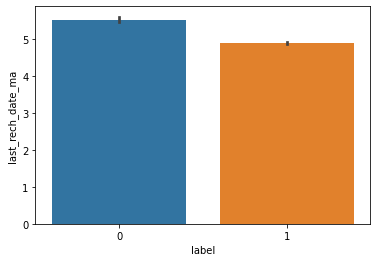

In [151]:
sns.barplot(x="label",y="last_rech_date_ma",data=df)

<AxesSubplot:xlabel='label', ylabel='cnt_ma_rech90'>

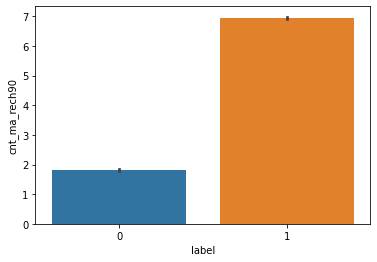

In [7]:
sns.barplot(x="label",y="cnt_ma_rech90",data=df)

* Less no of times main account recharged more chances of credit default.

<AxesSubplot:xlabel='label', ylabel='P_month'>

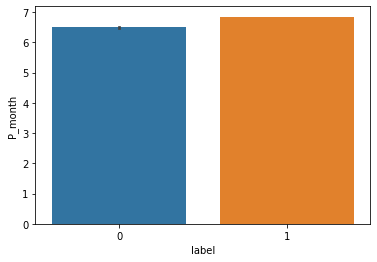

In [183]:
sns.barplot(x="label",y="P_month",data=df)

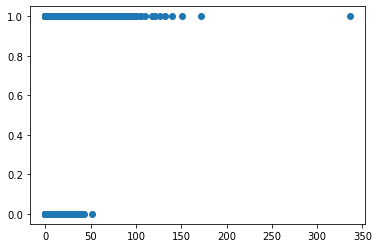

In [153]:
plt.scatter(df['cnt_ma_rech90'],df['label'])
plt.show()

In [ ]:
Most people who have recharged there main account less than 50 times in last 90 days have more chances of failure.

<AxesSubplot:>

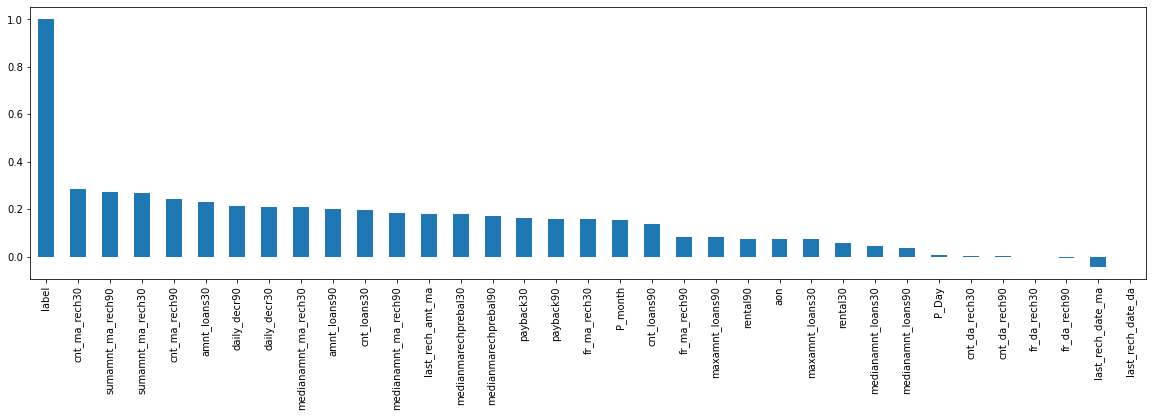

In [104]:
df.corr()['label'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))

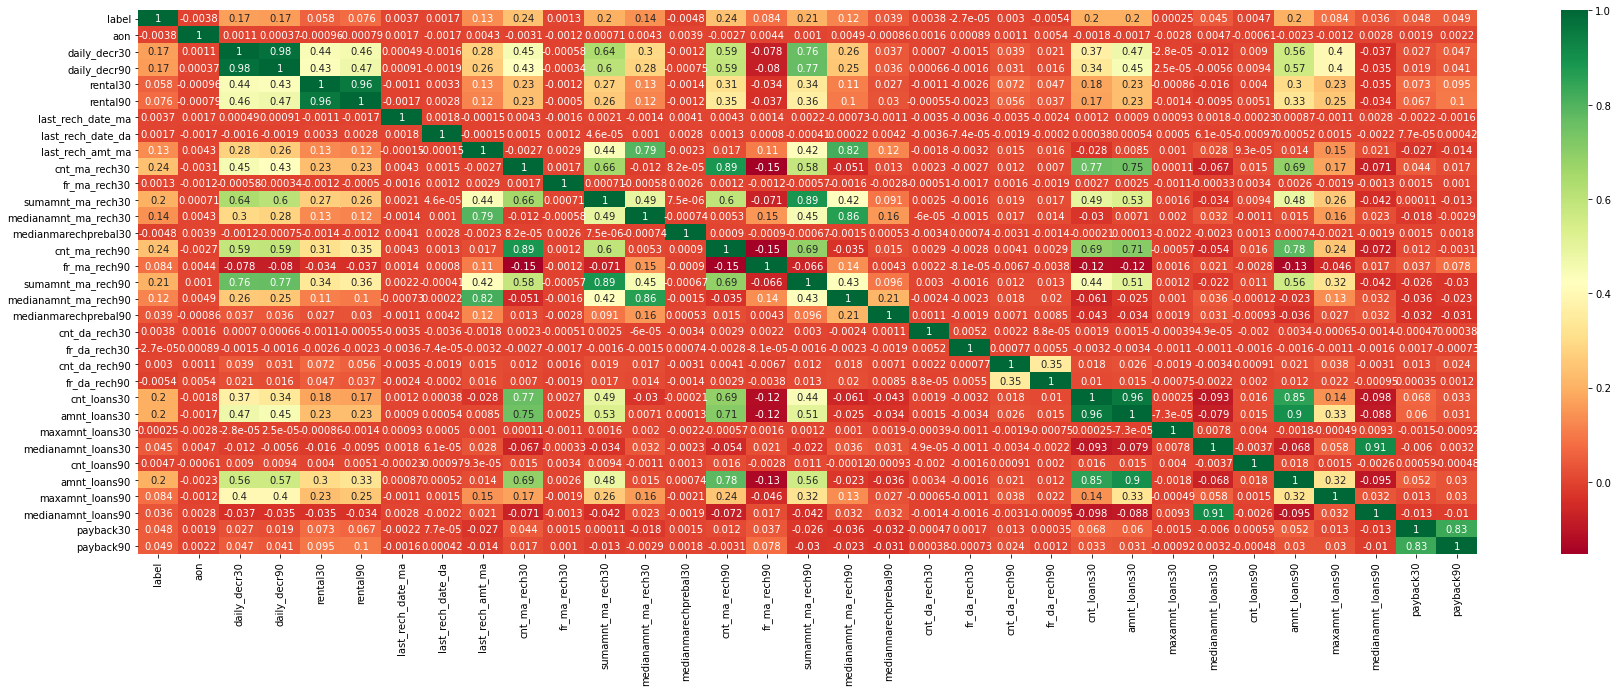

In [33]:
plt.figure(figsize = (30,10))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

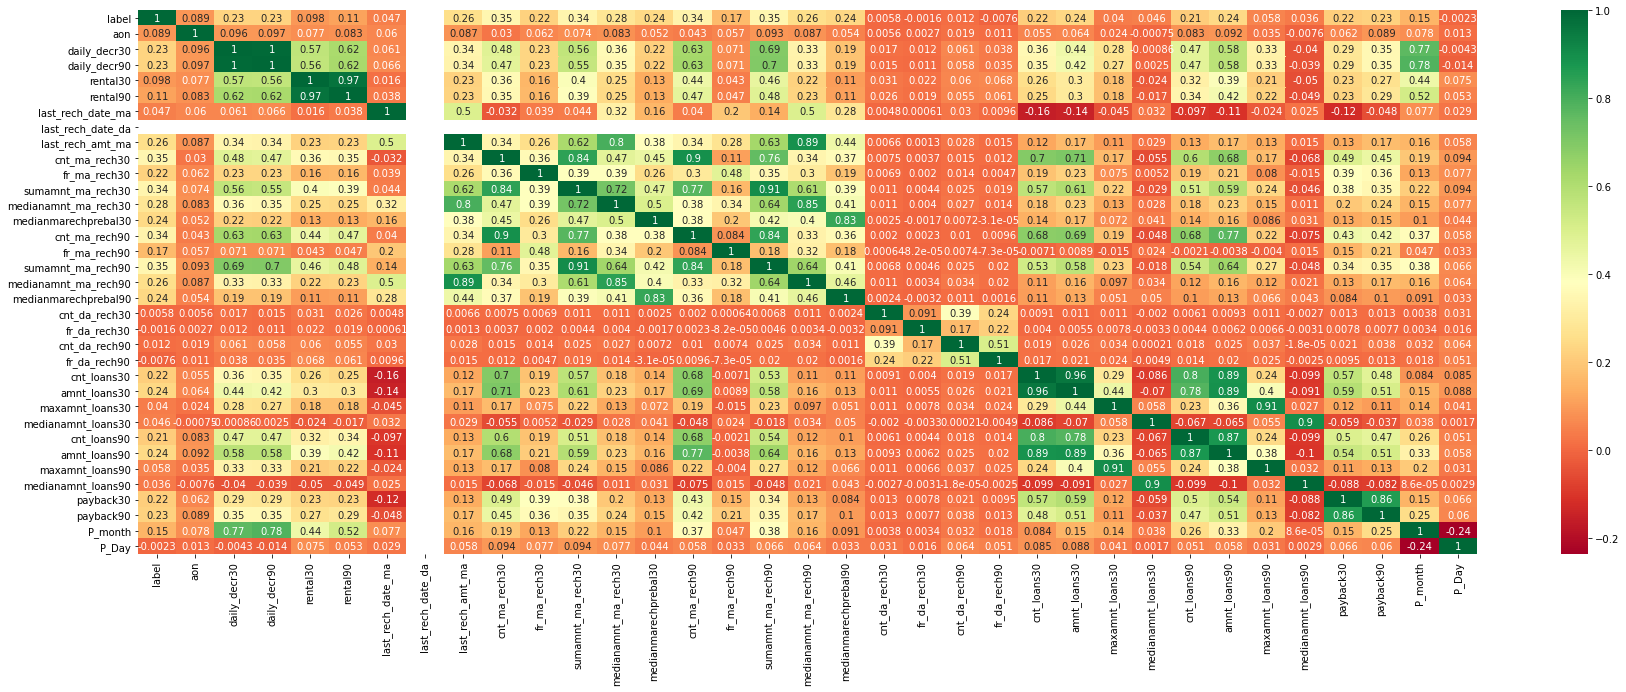

In [150]:
plt.figure(figsize = (30,10))
sns.heatmap(df1.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [268]:
label_count=pd.DataFrame(df['label'].value_counts())
label_count

,label
1,183431
0,26162


([<matplotlib.patches.Wedge at 0x1f70a99daf0>,
 [Text(-1.0165015953816021, 0.42038613986031703, '1'),
  Text(1.0165016150612964, -0.4203860922744423, '0')])

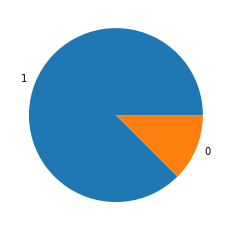

In [271]:
plt.pie(label_count['label'],labels=['1','0'])

In [272]:
df.skew()

label                   -2.270254
aon                      0.952374
daily_decr30             1.239238
daily_decr90             1.239001
rental30                 4.560510
rental90                 4.467282
last_rech_date_ma        1.133958
last_rech_date_da        0.000000
last_rech_amt_ma         1.003446
cnt_ma_rech30            0.904157
fr_ma_rech30             1.253282
sumamnt_ma_rech30        1.080771
medianamnt_ma_rech30     0.728219
medianmarechprebal30     1.105328
cnt_ma_rech90            2.451653
fr_ma_rech90             2.285423
sumamnt_ma_rech90        1.126421
medianamnt_ma_rech90     0.763904
medianmarechprebal90     1.053444
cnt_da_rech30           13.257074
fr_da_rech30            13.250037
cnt_da_rech90           27.267278
fr_da_rech90            26.081188
cnt_loans30              2.617377
amnt_loans30             1.231090
maxamnt_loans30          1.435587
medianamnt_loans30       4.551043
cnt_loans90              6.190825
amnt_loans90             3.150006
maxamnt_loans9

In [36]:
df1=np.sqrt(df)  #removing the skewness of the features

In [37]:
df1.skew()

label                   -2.270254
aon                      0.318991
daily_decr30             0.575904
daily_decr90             0.598369
rental30                 1.294750
rental90                 1.358978
last_rech_date_ma        0.312328
last_rech_date_da        0.000000
last_rech_amt_ma        -0.237208
cnt_ma_rech30           -0.141319
fr_ma_rech30             0.408171
sumamnt_ma_rech30        0.081148
medianamnt_ma_rech30    -0.563881
medianmarechprebal30     0.261988
cnt_ma_rech90            0.555533
fr_ma_rech90             1.038194
sumamnt_ma_rech90        0.213672
medianamnt_ma_rech90    -0.561451
medianmarechprebal90     0.193764
cnt_da_rech30           10.651890
fr_da_rech30            12.504925
cnt_da_rech90            8.187518
fr_da_rech90            19.346530
cnt_loans30              1.066586
amnt_loans30             0.543700
maxamnt_loans30         -1.570323
medianamnt_loans30       3.701226
cnt_loans90              2.204743
amnt_loans90             1.347151
maxamnt_loans9

In [167]:
df1['label'].value_counts()

1.0    183431
0.0     26162
Name: label, dtype: int64

In [38]:
y=df1['label']

In [39]:
x=df1.drop(['label'],axis=1)

In [170]:
x.shape

(209593, 34)

In [171]:
y.shape

(209593,)

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
smt=SMOTE()
x_s,y_s=smt.fit_resample(x,y)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x_s,y_s,random_state=42,test_size=0.27)

In [89]:
log_class1 = LogisticRegression(penalty='l2',C=1.0,class_weight='balanced',n_jobs=-1)

training1 = log_class1.fit(x_train,y_train)
pred1 = log_class1.predict(x_test)
CM1 = confusion_matrix(y_test,pred1)
CR1 = classification_report(y_test,pred1)
acc1 = accuracy_score(y_test,pred1)

print('confusion metrics :', '\n', CM1)
print('classification report ', '\n', CR1)
print('accuracy score: ', '\n' , acc1)

confusion metrics : 
 [[39582  9819]
 [12553 37099]]
classification report  
               precision    recall  f1-score   support

         0.0       0.76      0.80      0.78     49401
         1.0       0.79      0.75      0.77     49652

    accuracy                           0.77     99053
   macro avg       0.77      0.77      0.77     99053
weighted avg       0.78      0.77      0.77     99053

accuracy score:  
 0.7741411163720433


In [152]:
k=StratifiedKFold(n_splits=10,shuffle=False)
lg_score=cross_val_score(log_class1,x_train,y_train,cv=k,scoring='f1_weighted',n_jobs=-1)
print("cross validation score for Logistic Regression:",np.mean(lg_score))

cross validation score for Logistic Regression: 0.7762776740595008


In [47]:
rf_class1 = RandomForestClassifier()
rf_model1 = rf_class1.fit(x_train,y_train)
rf_pred1 = rf_class1.predict(x_test)
rf_CM1 = confusion_matrix(y_test,rf_pred1)
rf_CR1 = classification_report(y_test,rf_pred1)
rf_acc1 = accuracy_score(y_test,rf_pred1)

print('confusion metrics :', '\n', rf_CM1)
print('classification report ', '\n', rf_CR1)
print('accuracy score: ', '\n' , rf_acc1)

confusion metrics : 
 [[47201  2200]
 [ 2624 47028]]
classification report  
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.95     49401
         1.0       0.96      0.95      0.95     49652

    accuracy                           0.95     99053
   macro avg       0.95      0.95      0.95     99053
weighted avg       0.95      0.95      0.95     99053

accuracy score:  
 0.95129879963252


In [48]:
k=StratifiedKFold(n_splits=10,shuffle=False)
rf_score=cross_val_score(rf_class1,x_train,y_train,cv=k,scoring='f1_weighted',n_jobs=-1)
print("cross validation score for Random Forest Classifier:",np.mean(rf_score))

cross validation score for Random Forest Classifier: 0.9511771388457699


In [49]:
kn_clf=KNeighborsClassifier(n_neighbors=10)
kn_model1 = kn_clf.fit(x_train,y_train)
kn_pred1 = kn_clf.predict(x_test)
kn_CM1 = confusion_matrix(y_test,kn_pred1)
kn_CR1 = classification_report(y_test,kn_pred1)
kn_acc1 = accuracy_score(y_test,kn_pred1)

print('confusion metrics :', '\n', kn_CM1)
print('classification report ', '\n', kn_CR1)
print('accuracy score: ', '\n' , kn_acc1)

confusion metrics : 
 [[48627   774]
 [13589 36063]]
classification report  
               precision    recall  f1-score   support

         0.0       0.78      0.98      0.87     49401
         1.0       0.98      0.73      0.83     49652

    accuracy                           0.85     99053
   macro avg       0.88      0.86      0.85     99053
weighted avg       0.88      0.85      0.85     99053

accuracy score:  
 0.8549968198843043


In [51]:
dt_clf=DecisionTreeClassifier()
dt_model1 = dt_clf.fit(x_train,y_train)
dt_pred1 = dt_clf.predict(x_test)
dt_CM1 = confusion_matrix(y_test,dt_pred1)
dt_CR1 = classification_report(y_test,dt_pred1)
dt_acc1 = accuracy_score(y_test,dt_pred1)

print('confusion metrics :', '\n', dt_CM1)
print('classification report ', '\n', dt_CR1)
print('accuracy score: ', '\n' , dt_acc1)

confusion metrics : 
 [[45542  3859]
 [ 4633 45019]]
classification report  
               precision    recall  f1-score   support

         0.0       0.91      0.92      0.91     49401
         1.0       0.92      0.91      0.91     49652

    accuracy                           0.91     99053
   macro avg       0.91      0.91      0.91     99053
weighted avg       0.91      0.91      0.91     99053

accuracy score:  
 0.9142681190877611


In [103]:
k=StratifiedKFold(n_splits=10,shuffle=False)
dt_score=cross_val_score(dt_clf,x_train,y_train,cv=k,scoring='f1_macro',n_jobs=-1)
print("cross validation score for decision tree Classifier:",np.mean(dt_score))

cross validation score for decision tree Classifier: 0.9120783492494642


In [54]:
xgb_clf=XGBClassifier(learning_rate=0.001,n_estimators=100)
xgb_model1 = xgb_clf.fit(x_train,y_train)
xgb_pred1 = xgb_clf.predict(x_test)
xgb_CM1 = confusion_matrix(y_test,xgb_pred1)
xgb_CR1 = classification_report(y_test,xgb_pred1)
xgb_acc1 = accuracy_score(y_test,xgb_pred1)

print('confusion metrics :', '\n', xgb_CM1)
print('classification report ', '\n', xgb_CR1)
print('accuracy score: ', '\n' , xgb_acc1)

[12:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion metrics : 
 [[39054 10347]
 [ 4731 44921]]
classification report  
               precision    recall  f1-score   support

         0.0       0.89      0.79      0.84     49401
         1.0       0.81      0.90      0.86     49652

    accuracy                           0.85     99053
   macro avg       0.85      0.85      0.85     99053
weighted avg       0.85      0.85      0.85     99053

accuracy score:  
 0.8477784620354759


In [56]:
k=StratifiedKFold(n_splits=10,shuffle=False)
xg_score=cross_val_score(xgb_clf,x_train,y_train,cv=k,scoring='f1_weighted',n_jobs=-1)
print("cross validation score for XGBoost Classifier:",np.mean(xg_score))

cross validation score for XGBoost Classifier: 0.848400415945916


# Hyper parameter tuning of Random Forest classifier as it performs best for the dataset.

In [65]:
parameter={'splitter':['best','random'],'max_depth':range(2,10),
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2']}
GCV=GridSearchCV(dt_clf,parameter,cv=10,scoring='f1_macro',n_jobs=-1)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'splitter': 'best'}

In [98]:
parameter={'n_estimators':[100,300,400],'class_weight':['balanced', 'balanced_subsample'],
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt']}
RCV=RandomizedSearchCV(rf_class1,parameter,cv=5,scoring='f1_macro',n_jobs=-1)
RCV.fit(x_train,y_train)
RCV.best_params_

{'n_estimators': 300,
 'max_features': 'auto',
 'criterion': 'gini',
 'class_weight': 'balanced'}

In [175]:
final_mod=RandomForestClassifier(n_estimators=300,max_features= 'auto',criterion='gini',class_weight='balanced')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
fin_CM = confusion_matrix(y_test,pred)
fin_CR = classification_report(y_test,pred)
fin_acc = accuracy_score(y_test,pred)

print('confusion metrics :', '\n', fin_CM)
print('classification report ', '\n', fin_CR)
print('accuracy score: ', '\n' , fin_acc)

confusion metrics : 
 [[47183  2218]
 [ 2512 47140]]
classification report  
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.95     49401
         1.0       0.96      0.95      0.95     49652

    accuracy                           0.95     99053
   macro avg       0.95      0.95      0.95     99053
weighted avg       0.95      0.95      0.95     99053

accuracy score:  
 0.9522477865385198


0.9522550011377501


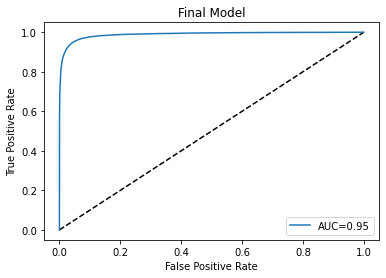

In [177]:
y_pred_prob=final_mod.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AUC=%0.2f' % auc_score)
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Final Model')
#plt.savefig(os.path.join('microcreditauc.png'))
auc_score=roc_auc_score(y_test,final_mod.predict(x_test))
print(auc_score)

AxesSubplot(0.125,0.125;0.62x0.755)


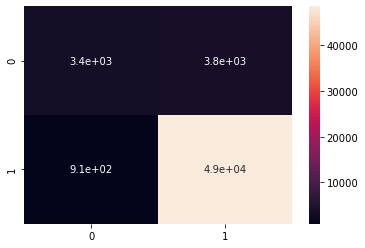

In [159]:
print(sns.heatmap(fin_CM,annot=True))

In [190]:
#Saving the best model
import joblib
joblib.dump(final_mod,'Micro_credit.obj')

['Micro_credit.obj']

In [191]:
a=np.array(y_test)
predicted=np.array(final_mod.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
...,...,...
99048,0.0,0.0
99049,1.0,1.0
99050,0.0,0.0
99051,0.0,0.0


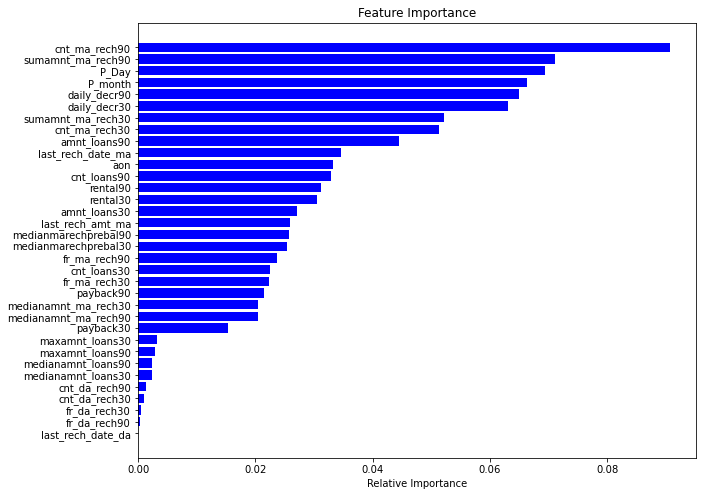

In [189]:
features=df1.drop(['label'],axis=1).columns
importances=final_mod.feature_importances_
indices=np.argsort(importances)
plt.figure(figsize = (10,8))
plt.title('Feature Importance')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()